<font color='purple' size=6><p style='text-align: justify;'>**Segundo cuaderno**

Mayra Alejandra Carreño Corzo
Código: 2172037

In [255]:
from numpy import *
import pandas as pd
from sympy import integrate, var, diff, exp, oo
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sio

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sio

<font color='purple' size=6><p style='text-align: justify;'>**EJERCICIO **

<font color='blue' size=6><p style='text-align: justify;'>**Curvas de calibración**

1. curva de calibración Ca

In [258]:
cvc = pd.DataFrame()
#nombres=['MF']
for f2 in glob.glob("./Datos/Ca/curva1/*C1.asc"):
    df = pd.read_csv(f2, header=None, delimiter='\t' )
    cvc = pd.concat([cvc, df], axis=1)
    print(f2)
dataCa=cvc.drop(cvc.index[[0]]) 
ysCa=dataCa[1]
dataCa.columns=range(dataCa.shape[1])
xsCa=dataCa[[0]]
ysCa.columns=range(ysCa.shape[1])

./Datos/Ca/curva1\1122,2 c1.asc
./Datos/Ca/curva1\14427,5 c1.asc
./Datos/Ca/curva1\18836 c1.asc
./Datos/Ca/curva1\4008 c1.asc
./Datos/Ca/curva1\9217 c1.asc


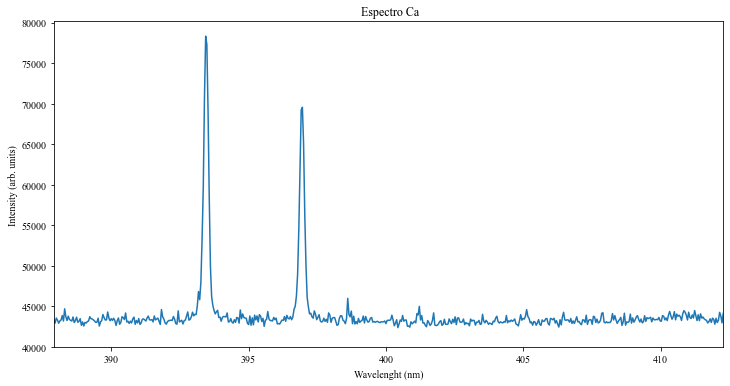

In [259]:
ysCa=np.array(ysCa)
xsCa=np.array(xsCa)
fig, esp= plt.subplots(figsize=(12, 6))
plt.rcParams["font.family"] = 'Times New Roman'
esp.plot(xsCa, ysCa[:,1])
esp.set_xlim(np.min(xsCa)+10, np.max(xsCa)-10)
esp.set_title(" Espectro Ca")
esp.set_xlabel("Wavelenght (nm)")
esp.set_ylabel("Intensity (arb. units)");

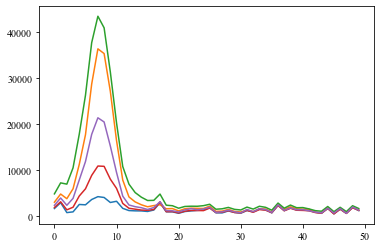

In [260]:
plt.plot(ysCa[350:400]-np.min(ysCa[0:,0]));

In [261]:
A1Ca=(ysCa[350:400]-np.min(ysCa[0:,0])).sum(axis=0)
C1Ca=pd.DataFrame([1122.2, 14427.5, 18836, 4008, 9217])
A1Ca=pd.DataFrame(A1Ca)
D1Ca=pd.concat([C1Ca, A1Ca], axis=1)
D1Ca=D1Ca.set_axis(['[ppm]', 'Int'], axis=1, inplace=False)
D1Ca

,[ppm],Int
0,1122.2,75728
1,14427.5,258612
2,18836.0,343016
3,4008.0,111915
4,9217.0,173500


In [262]:
import sklearn.metrics as skm
from sklearn import linear_model
xCa=D1Ca[['[ppm]']] 
yCa=D1Ca[['Int']]
reg = linear_model.LinearRegression()
reg.fit(xCa, yCa)
y1Ca_pred = reg.predict(xCa)
mCa=reg.coef_[0]
bCa=reg.intercept_[0]
mse=skm.mean_squared_error(yCa, y1Ca_pred)
r2Ca=skm.r2_score(yCa, y1Ca_pred)
xCa= np.array(xCa)

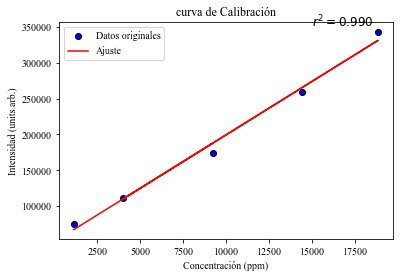

In [263]:
fig, ax= plt.subplots()
ax.scatter(xCa, yCa, color='blue', label='Datos originales', edgecolors='black')
ax.plot(xCa, y1Ca_pred, 'r', label='Ajuste')
ax.legend()
ax.set_title("curva de Calibración")
ax.set_xlabel("Concentración (ppm)")
ax.set_ylabel("Intensidad (units arb.)")
ax.text(15000,350000, r"$r^2 = "+str("{0:.3f}".format(r2Ca))+r"$", fontsize=12, color="black")
plt.show()
fig.savefig("ccal1.pdf",bbox_inches='tight')

2. curva de calibración k

In [264]:
cvc = pd.DataFrame()

for f3 in glob.glob("./Datos/K/curva2/*c2.asc"):
    df = pd.read_csv(f3, header=None, delimiter='\t' )
    cvc = pd.concat([cvc, df], axis=1)
    print(f3)
dataK=cvc.drop(cvc.index[[0]]) 
ysK=dataK[1]
dataK.columns=range(dataK.shape[1])
xsK=dataK[[0]]
ysK.columns=range(ysK.shape[1])

./Datos/K/curva2\13684,4 c2.asc
./Datos/K/curva2\3909.8  c2.asc
./Datos/K/curva2\7037,6 c2.asc
./Datos/K/curva2\977.4 c2.asc
./Datos/K/curva2\9779.5 c2.asc


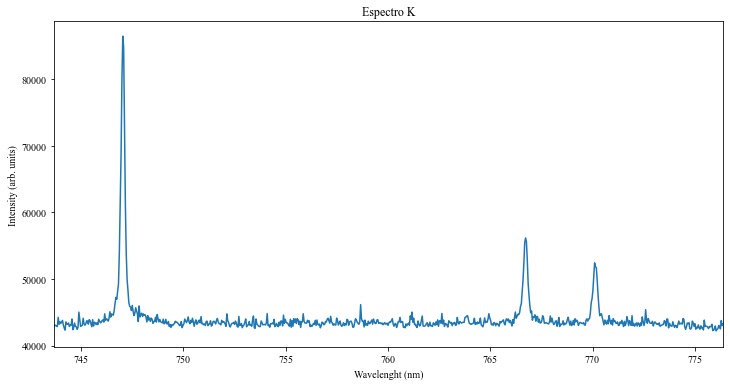

In [265]:
ysK=np.array(ysK)
xsK=np.array(xsK)
fig, esp= plt.subplots(figsize=(12, 6))
plt.rcParams["font.family"] = 'Times New Roman'
esp.plot(xsK, ysK[:,0])
esp.set_xlim(np.min(xsK)+5, np.max(xsK)-5)
esp.set_title("Espectro K")
esp.set_xlabel("Wavelenght (nm)")
esp.set_ylabel("Intensity (arb. units)");

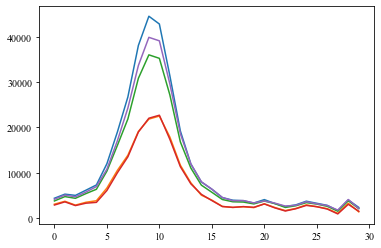

In [266]:
plt.plot(ysK[190:220]-np.min(ysK[0:,0]));

In [267]:
A1K=(ysK[190:220]-np.min(ysK[0:,0])).sum(axis=0)
C1K=pd.DataFrame([13684.4, 3909.8, 7037.6, 977.4, 9779.5])
A1K=pd.DataFrame(A1K)
D1K=pd.concat([C1K, A1K], axis=1)
D1K=D1K.set_axis(['[ppm]', 'Int'], axis=1, inplace=False)
D1K

,[ppm],Int
0,13684.4,334532
1,3909.8,190299
2,7037.6,286138
3,977.4,186611
4,9779.5,311732


In [268]:
import sklearn.metrics as skm
from sklearn import linear_model
xK=D1K[['[ppm]']] 
yK=D1K[['Int']]
reg = linear_model.LinearRegression()
reg.fit(xK, yK)
y3_pred = reg.predict(xK)
mK=reg.coef_[0]
bK=reg.intercept_[0]
mse=skm.mean_squared_error(yK, y3_pred)
r2K=skm.r2_score(yK, y3_pred)
xK= np.array(xK)

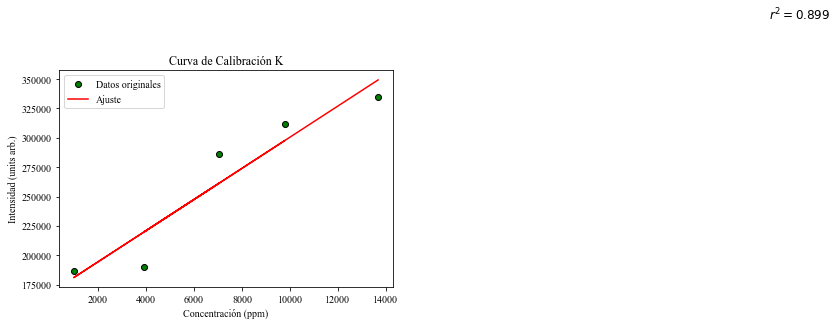

In [269]:
fig, ax= plt.subplots()
ax.scatter(xK, yK, color='green', label='Datos originales', edgecolors='black')
ax.plot(xK, y3_pred, 'r', label='Ajuste')
ax.legend()
ax.set_title("Curva de Calibración K")
ax.set_xlabel("Concentración (ppm)")
ax.set_ylabel("Intensidad (units arb.)")
ax.text(30000,40e4, r"$r^2 = "+str("{0:.3f}".format(r2K))+r"$", fontsize=12, color="black")
plt.show()
fig.savefig("3.pdf",bbox_inches='tight')

3. curva de calibración Na

In [270]:
import glob
cvc = pd.DataFrame()
#nombres=['MF']
for f in glob.glob("./Datos/Na/CURVA1/*C1.asc"):
    df = pd.read_csv(f, header=None, delimiter='\t' )
    cvc = pd.concat([cvc, df], axis=1)
    print(f)
data=cvc.drop(cvc.index[[0]]) # Eliminamos el primer la primera fila
ys=data[1]
data.columns=range(data.shape[1])
xs=data[[0]]
ys.columns=range(ys.shape[1])

./Datos/Na/CURVA1\1145 C1.asc
./Datos/Na/CURVA1\11450 C1.asc
./Datos/Na/CURVA1\18320 C1.asc
./Datos/Na/CURVA1\25190 C1.asc
./Datos/Na/CURVA1\35000 C1.asc
./Datos/Na/CURVA1\45000 C1.asc
./Datos/Na/CURVA1\6870 C1.asc


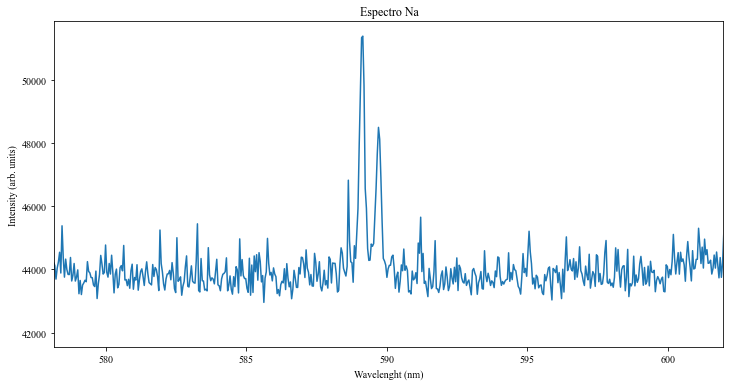

In [271]:
ys=np.array(ys)
xs=np.array(xs)
fig, esp= plt.subplots(figsize=(12, 6))
plt.rcParams["font.family"] = 'Times New Roman'
esp.plot(xs, ys[:,0])
esp.set_xlim(np.min(xs)+10, np.max(xs)-10)
esp.set_title(" Espectro Na")
esp.set_xlabel("Wavelenght (nm)")
esp.set_ylabel("Intensity (arb. units)");

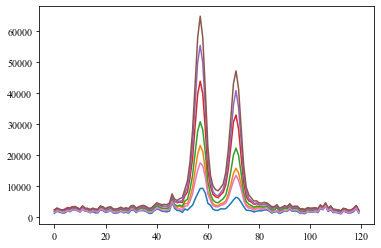

In [272]:
plt.plot(ys[430:550]-np.min(ys[0:,0]));

In [273]:
A1=(ys[420:550]-np.min(ys[0:,0])).sum(axis=0)
C1=pd.DataFrame([1145, 11450, 18320, 25190, 35000, 45000, 6870])
A1=pd.DataFrame(A1)
D1=pd.concat([C1, A1], axis=1)
D1=D1.set_axis(['[ppm]', 'Int'], axis=1, inplace=False)
D1

,[ppm],Int
0,1145,315599
1,11450,527835
2,18320,617796
3,25190,808035
4,35000,898722
5,45000,1037392
6,6870,430298


In [274]:
import sklearn.metrics as skm
from sklearn import linear_model
x=D1[['[ppm]']] 
y=D1[['Int']]
reg = linear_model.LinearRegression()
reg.fit(x, y)
y1_pred = reg.predict(x)
m=reg.coef_[0]
b=reg.intercept_[0]
mse=skm.mean_squared_error(y, y1_pred)
r2=skm.r2_score(y, y1_pred)
x= np.array(x)

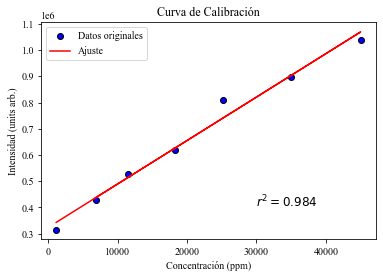

In [275]:
fig, ax= plt.subplots()
ax.scatter(x, y, color='blue', label='Datos originales', edgecolors='black')
ax.plot(x, y1_pred, 'r', label='Ajuste')
ax.legend()
ax.set_title("Curva de Calibración")
ax.set_xlabel("Concentración (ppm)")
ax.set_ylabel("Intensidad (units arb.)")
ax.text(30000,0.4e6, r"$r^2 = "+str("{0:.3f}".format(r2))+r"$", fontsize=12, color="black")
plt.show()
fig.savefig("ccal1.pdf",bbox_inches='tight')

4. curva de calibración Mg

In [276]:
cvc = pd.DataFrame()
#nombres=['MF']
for f4 in glob.glob("./Datos/Mg/curva 3/*c3.asc"):
    df = pd.read_csv(f4, header=None, delimiter='\t' )
    cvc = pd.concat([cvc, df], axis=1)
    print(f4)
dataMg=cvc.drop(cvc.index[[0]])
ysMg=dataMg[1]
dataMg.columns=range(dataMg.shape[1])
xsMg=dataMg[[0]]
ysMg.columns=range(ysMg.shape[1])

./Datos/Mg/curva 3\1142 c3.asc
./Datos/Mg/curva 3\14097 c3.asc
./Datos/Mg/curva 3\2430 c3.asc
./Datos/Mg/curva 3\5833 c3.asc
./Datos/Mg/curva 3\9772 c3.asc


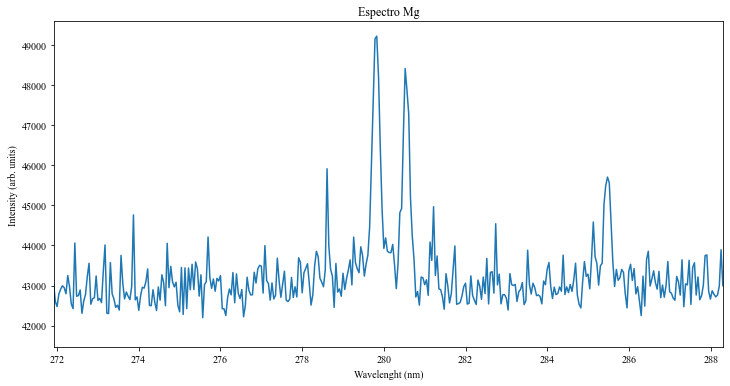

In [277]:
ysMg=np.array(ysMg)
xsMg=np.array(xsMg)
fig, esp= plt.subplots(figsize=(12, 6))
plt.rcParams["font.family"] = 'Times New Roman'
esp.plot(xsMg, ysMg[:,0])
esp.set_xlim(np.min(xsMg)+14, np.max(xsMg)-14)
esp.set_title("Espectro Mg")
esp.set_xlabel("Wavelenght (nm)")
esp.set_ylabel("Intensity (arb. units)");

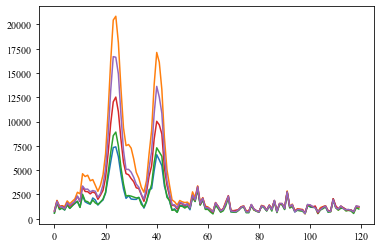

In [278]:
plt.plot(ysMg[480:600]-np.min(ysMg[0:,0]));

In [279]:
A1Mg=(ysMg[480:600]-np.min(ysMg[0:,0])).sum(axis=0)
C1Mg=pd.DataFrame([1142, 14097, 2430, 5833, 9772])
A1Mg=pd.DataFrame(A1Mg)
D1Mg=pd.concat([C1Mg, A1Mg], axis=1)
D1Mg=D1Mg.set_axis(['[ppm]', 'Int'], axis=1, inplace=False)
D1Mg

,[ppm],Int
0,1142,212527
1,14097,407786
2,2430,218160
3,5833,292155
4,9772,334630


In [280]:
import sklearn.metrics as skm
from sklearn import linear_model
xMg=D1Mg[['[ppm]']] 
yMg=D1Mg[['Int']]
reg = linear_model.LinearRegression()
reg.fit(xMg, yMg)
y4_pred = reg.predict(xMg)
mMg=reg.coef_[0]
bMg=reg.intercept_[0]
mse=skm.mean_squared_error(yMg, y4_pred)
r2Mg=skm.r2_score(yMg, y4_pred)
xMg= np.array(xMg)

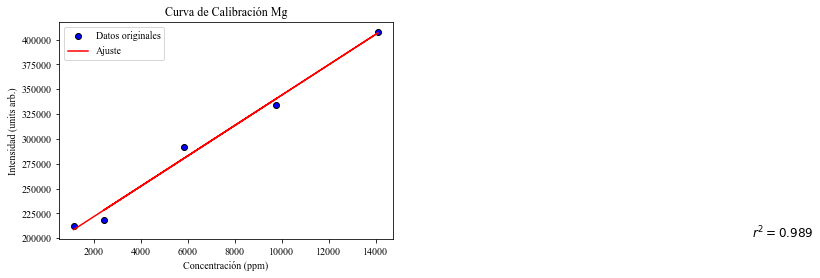

In [281]:
fig, ax= plt.subplots()
ax.scatter(xMg, yMg, color='blue', label='Datos originales', edgecolors='black')
ax.plot(xMg, y4_pred, 'r', label='Ajuste')
ax.legend()
ax.set_title("Curva de Calibración Mg")
ax.set_xlabel("Concentración (ppm)")
ax.set_ylabel("Intensidad (units arb.)")
ax.text(30000,20e4, r"$r^2 = "+str("{0:.3f}".format(r2Mg))+r"$", fontsize=12, color="black")
plt.show()
fig.savefig("4.pdf",bbox_inches='tight')

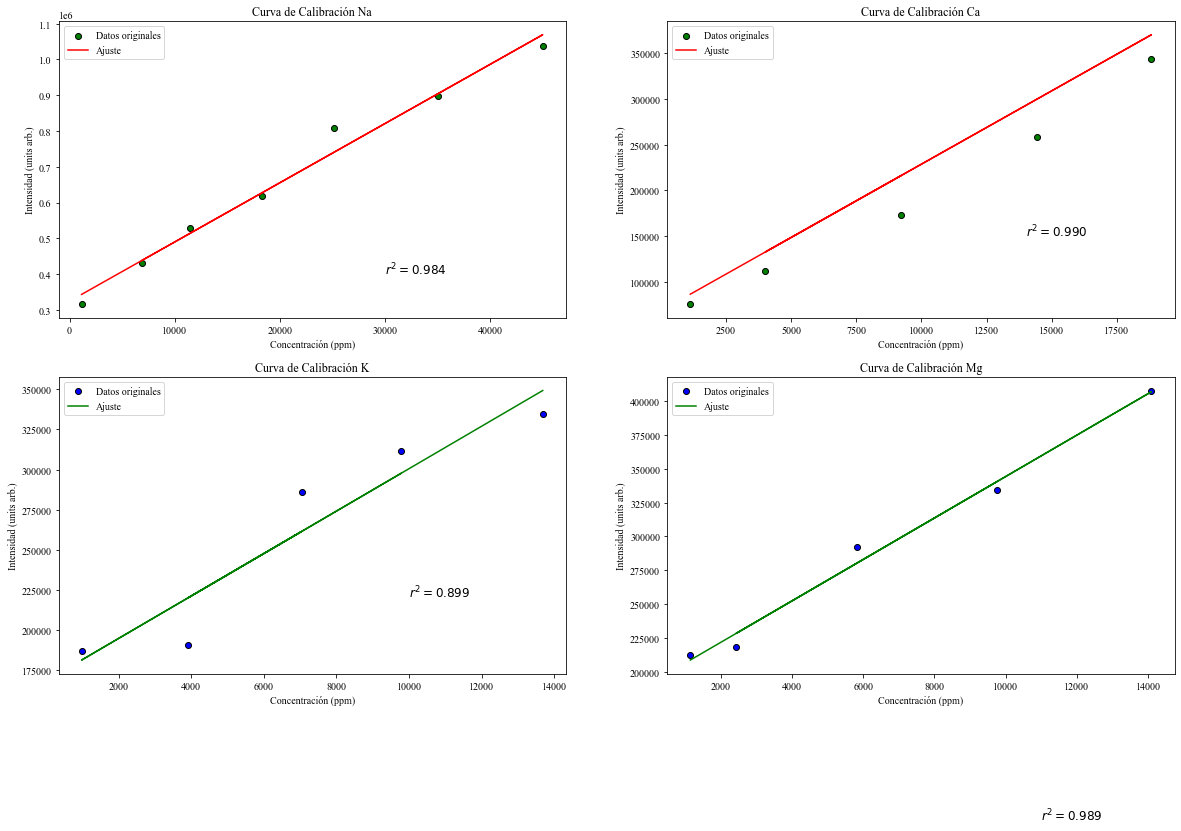

In [282]:
fig, ax= plt.subplots(2,2, figsize=(20, 12))
ax[0,0].scatter(x, y, color='green', label='Datos originales', edgecolors='black')
ax[0,0].plot(x, y1_pred, 'r', label='Ajuste')
ax[0,0].legend()
ax[0,0].set_title("Curva de Calibración Na")
ax[0,0].set_xlabel("Concentración (ppm)")
ax[0,0].set_ylabel("Intensidad (units arb.)")
ax[0,0].text(30000,0.4e6, r"$r^2 = "+str("{0:.3f}".format(r2))+r"$", fontsize=12, color="black")

ax[0,1].scatter(xCa, yCa, color='green', label='Datos originales', edgecolors='black')
ax[0,1].plot(xCa, y2_pred, 'r', label='Ajuste')
ax[0,1].legend()
ax[0,1].set_title("Curva de Calibración Ca")
ax[0,1].set_xlabel("Concentración (ppm)")
ax[0,1].set_ylabel("Intensidad (units arb.)")
ax[0,1].text(14000,15e4, r"$r^2 = "+str("{0:.3f}".format(r2Ca))+r"$", fontsize=12, color="black")

ax[1,0].scatter(xK, yK, color='blue', label='Datos originales', edgecolors='black')
ax[1,0].plot(xK, y3_pred, 'green', label='Ajuste')
ax[1,0].legend()
ax[1,0].set_title("Curva de Calibración K")
ax[1,0].set_xlabel("Concentración (ppm)")
ax[1,0].set_ylabel("Intensidad (units arb.)")
ax[1,0].text(10000,22e4, r"$r^2 = "+str("{0:.3f}".format(r2K))+r"$", fontsize=12, color="black")

ax[1,1].scatter(xMg, yMg, color='blue', label='Datos originales', edgecolors='black')
ax[1,1].plot(xMg, y4_pred, 'green', label='Ajuste')
ax[1,1].legend()
ax[1,1].set_title("Curva de Calibración Mg")
ax[1,1].set_xlabel("Concentración (ppm)")
ax[1,1].set_ylabel("Intensidad (units arb.)")
ax[1,1].text(11000, 9e4, r"$r^2 = "+str("{0:.3f}".format(r2Mg))+r"$", fontsize=12, color="black")

plt.show()


<font color='purple' size=6><p style='text-align: justify;'>**muestra desconocida**

Na

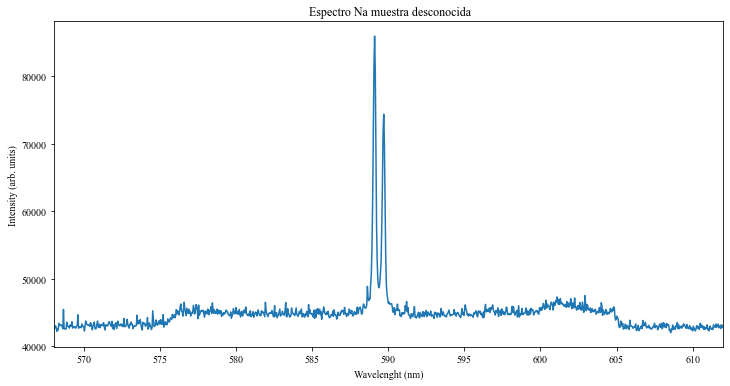

In [232]:
descoNa=pd.read_csv("./Datos/Na/MUESTRA DESCONOCIDA/muestra desxx v2.asc", header=None, delimiter='\t')
fig, esp= plt.subplots(figsize=(12, 6))
esp.set_xlim(568, 612)
esp.set_title(" Espectro Na muestra desconocida")
esp.set_xlabel("Wavelenght (nm)")
esp.set_ylabel("Intensity (arb. units)");
esp.plot(descoNa[0],descoNa[1])

In [200]:
cvcNa1 = pd.DataFrame()
for fNa1 in glob.glob("./Datos/Na/MUESTRA DESCONOCIDA/*v2.asc"):
    dfNa1 = pd.read_csv(fNaU, header=None, delimiter='\t' )
    cvcNa1 = pd.concat([cvcNa1, dfNa1], axis=1)
    print(fNa) 
dataNa1=cvcNa1.drop(cvcNa1.index[[0]])
yNa1=dataNa1[1] 
dataNa1.columns=range(dataNa1.shape[1])
yNa=np.array(yNa)


./Datos/Na/MUESTRA DESCONOCIDA\muestra desxx v2.asc


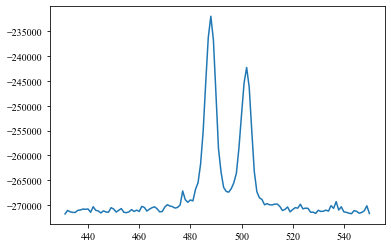

In [215]:
plt.plot(yNa1[430:550]-np.min(y[:,0]));

In [216]:
regressorNa = LinearRegression()
regressorNa.fit(x, y1_pred,)
print(regressorNa.intercept_)
print(regressorNa.coef_)

[324177.51770474]
[[16.55138574]]


In [223]:
ANaU=(yNa1[430:550]-np.min(y[:,0])).sum(axis=0)
ANaU

-32111593

In [224]:
mNa = 16.55138574
bNa = 324177.51770474
ConcentraciónNa = (32111593-bNa)/(mNa)
ConcentraciónNa

1920528.950362996

Ca

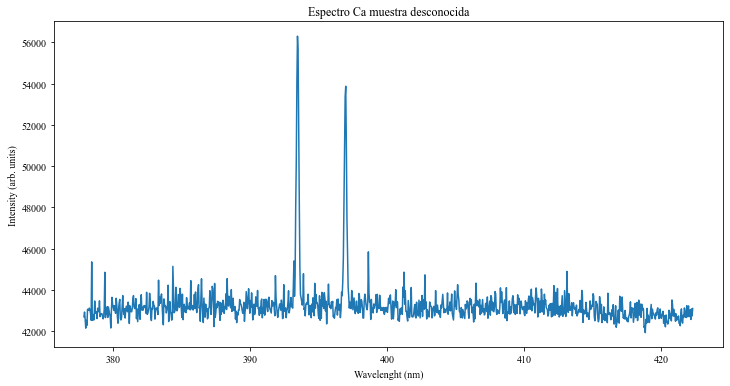

In [210]:
descoCa=pd.read_csv("./Datos/Ca/desconocidad 2/muestra zz v3.asc", header=None, delimiter='\t')
y=np.array(y)
x=np.array(x)
fig, esp= plt.subplots(figsize=(12, 6))
esp.set_title("Espectro Ca muestra desconocida")
esp.set_xlabel("Wavelenght (nm)")
esp.set_ylabel("Intensity (arb. units)");
esp.plot(descoCa[0],descoCa[1])

In [208]:
regressorCa = LinearRegression()
regressorCa.fit(xCa, y2_pred)
print(regressorCa.intercept_)
print(regressorCa.coef_)

[68767.3218488]
[[15.98933414]]


In [219]:
cvcCa = pd.DataFrame()
for fCa in glob.glob("./Datos/Ca/desconocidad 2/muestra zz v3.asc"):
    dfCa1 = pd.read_csv(fCa, header=None, delimiter='\t' )
    cvcCa = pd.concat([cvcCa, dfCa1], axis=1)
    print(fCa) 
dataCa=cvcCa.drop(cvcCa.index[[0]])
yCa1=dataCa[1] 
dataCa.columns=range(dataCa.shape[1])

./Datos/Ca/desconocidad 2/muestra zz v3.asc


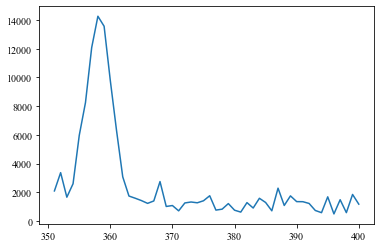

In [222]:
plt.plot(yCa1[350:400]-np.min(ysCa[:,0]));

In [225]:
ACaU=(yCa[350:400]-np.min(y[:,0])).sum(axis=0)
ACaU

-13547493

In [226]:
mCa = 15.98933414
bCa = 68767.3218488
ConcentraciónCa = (13547493-bCa)/(mCa)
ConcentraciónCa

842982.3005844819

k

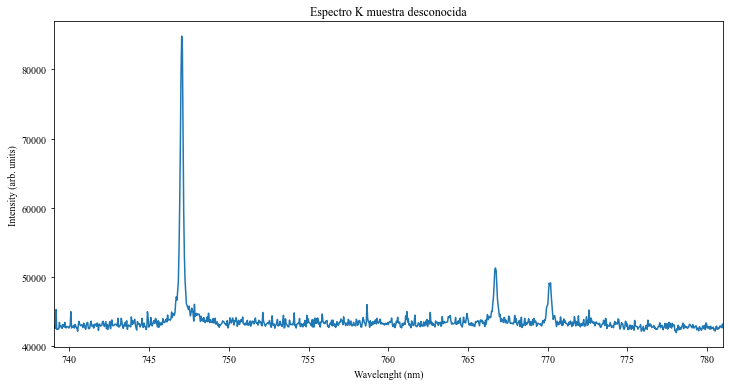

In [228]:
descoK=pd.read_csv("./Datos/K/muestra desc 2/muestra zz v3.asc", header=None, delimiter='\t')
fig, esp= plt.subplots(figsize=(12, 6))
esp.set_xlim(739, 781)
esp.set_title("Espectro K muestra desconocida")
esp.set_xlabel("Wavelenght (nm)")
esp.set_ylabel("Intensity (arb. units)");
esp.plot(descoK[0],descoK[1])

In [235]:
cvck1 = pd.DataFrame()
for fk1 in glob.glob("./Datos/Na/MUESTRA DESCONOCIDA/*v2.asc"):
    dfk1 = pd.read_csv(fk1, header=None, delimiter='\t' )
    cvck1 = pd.concat([cvck1, dfk1], axis=1)
    print(fk1) 
datak1=cvck1.drop(cvck1.index[[0]])
yk1=datak1[1] 
datak1.columns=range(datak1.shape[1])
yk1=np.array(yk1)


./Datos/Na/MUESTRA DESCONOCIDA\muestra desxx v2.asc


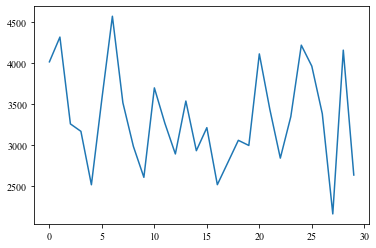

In [238]:
plt.plot(yk1[190:220]-np.min(yk[:,0]));

In [230]:
regressorK = LinearRegression()
regressorK.fit(xK, y3_pred)
print(regressorK.intercept_)
print(regressorK.coef_)

[168190.8432126]
[[13.2346705]]


In [240]:
AkU=(yk1[190:220]-np.min(y[:,0])).sum(axis=0)
AkU

-8110315

In [241]:
mK = 13.2346705
bK = 168190.8432126
ConcentraciónK = (8110315-bK)/(mK)
ConcentraciónK

600099.8783299818

Mg

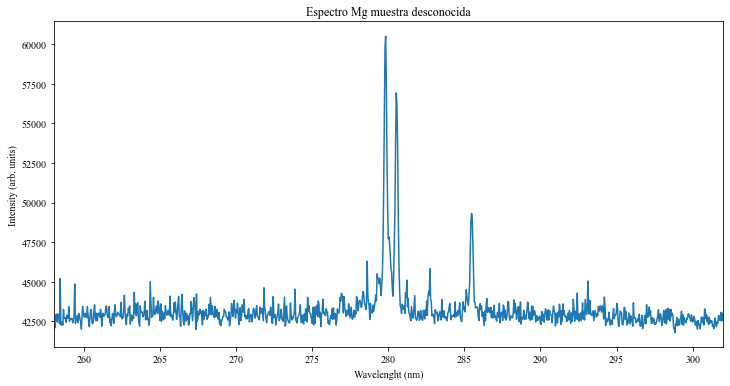

In [246]:
descoMg=pd.read_csv("./Datos/Mg/desco 1/desco 1 v1.asc", header=None, delimiter='\t')
fig, esp= plt.subplots(figsize=(12, 6))
esp.set_xlim(258, 302)
esp.set_title("Espectro Mg muestra desconocida")
esp.set_xlabel("Wavelenght (nm)")
esp.set_ylabel("Intensity (arb. units)");
esp.plot(descoMg[0],descoMg[1])

In [247]:
cvcMg1 = pd.DataFrame()
for fMg1 in glob.glob("./Datos/Mg/desco 1/*v1.asc"):
    dfMg1 = pd.read_csv(fMg1, header=None, delimiter='\t' )
    cvcMg1 = pd.concat([cvcMg1, dfMg1], axis=1)
    print(fMg1) 
dataMg1=cvcMg1.drop(cvcMg1.index[[0]])
yMg1=dataMg1[1] 
dataMg1.columns=range(dataMg1.shape[1])
yMg1=np.array(yMg1)


./Datos/Mg/desco 1\desco 1 v1.asc


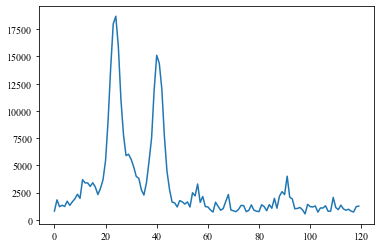

In [250]:
plt.plot(yMg1[480:600]-np.min(ysMg[:,0]));

In [231]:
regressorMg = LinearRegression()
regressorMg.fit(xMg, y4_pred)
print(regressorMg.intercept_)
print(regressorMg.coef_)

[191229.89784761]
[[15.3004902]]


In [251]:
AMgU=(yMg1[480:600]-np.min(y[:,0])).sum(axis=0)
AMgU

-32487914

In [252]:
mMg = 15.3004902
bMg = 191229.89784761
ConcentraciónMg = (32487914-bMg)/(mMg)
ConcentraciónMg

2110826.7565278653